# Introduction to Python  

## Pandas - Exploratory Data Analysis (EDA) part 1

In [1]:
import os
import zipfile
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

## Pandas Basic EDA 

In [2]:
pd.__version__

'1.5.2'

In [3]:
# Importing csv file
df = pd.read_csv('../../Data/csv/taxis_bikes_nycity.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.head()

,Date,Distance,Time
0,8/2/15,1.70,NaN
1,8/3/15,1.40,NaN
2,8/4/15,2.10,NaN
3,8/6/15,2.38,NaN
4,8/7/15,2.30,NaN


In [5]:
df.tail(10)

,Date,Distance,Time
71,12/17/15,12.00,1:39:00
72,12/19/15,3.10,0:26:15
73,12/20/15,14.80,2:15:00
74,12/22/15,3.10,0:28:00
75,12/23/15,5.63,0:51:50
76,12/24/15,3.05,0:25:08
77,12/25/15,14.80,2:20:00
78,12/26/15,5.20,NaN
79,12/30/15,3.15,0:22:10
80,1/1/16,26.20,4:20:43


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      81 non-null     object 
 1   Distance  81 non-null     float64
 2   Time      52 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.0+ KB


In [7]:
df.dtypes

Date         object
Distance    float64
Time         object
dtype: object

In [8]:
df.columns

Index(['Date', 'Distance', 'Time'], dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=81, step=1)

In [10]:
df['Date'].head()

0    8/2/15
1    8/3/15
2    8/4/15
3    8/6/15
4    8/7/15
Name: Date, dtype: object

In [11]:
df = pd.read_csv('../../Data/csv/taxis_bikes_nycity.csv', parse_dates = ['Date'])

In [12]:
df['Date'].head()

0   2015-08-02
1   2015-08-03
2   2015-08-04
3   2015-08-06
4   2015-08-07
Name: Date, dtype: datetime64[ns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      81 non-null     datetime64[ns]
 1   Distance  81 non-null     float64       
 2   Time      52 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.0+ KB


In [14]:
df.set_index('Date', inplace = True)

In [15]:
df.head(10)

,Distance,Time
Date,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN
2015-08-08,3.40,NaN
2015-08-09,2.50,NaN
2015-08-10,3.36,0:28:37
2015-08-11,1.67,0:13:07


<AxesSubplot: xlabel='Date'>

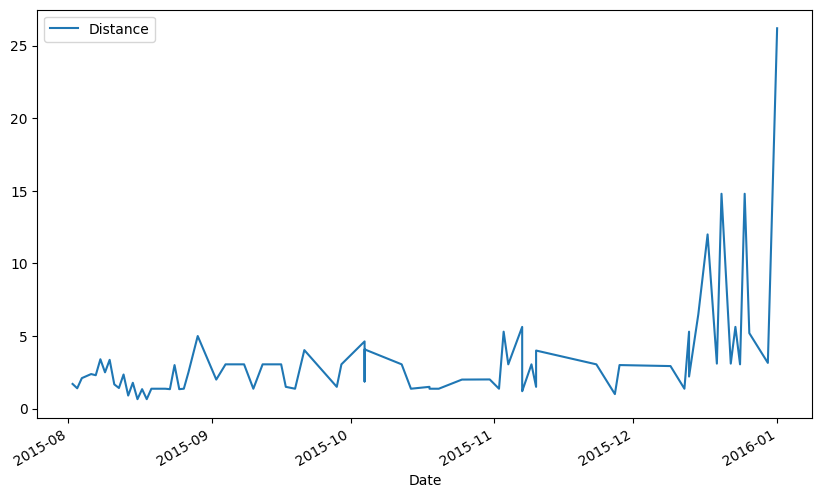

In [16]:
df.plot(figsize=(10,6))

In [17]:
# ?df.plot   #help on method

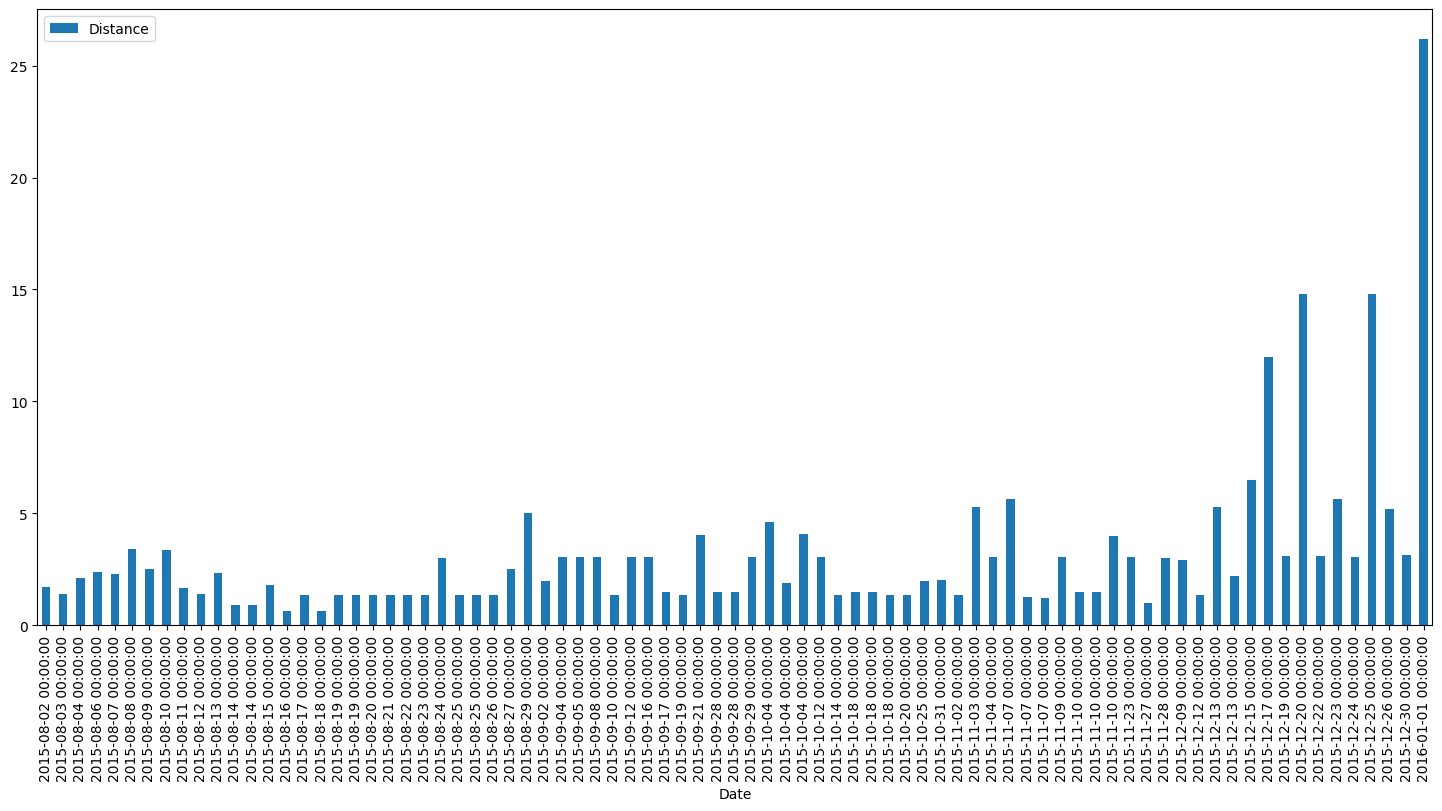

In [18]:
df.plot(kind='bar', figsize=(18,8))
plt.show()

Text(0, 0.5, 'Count')

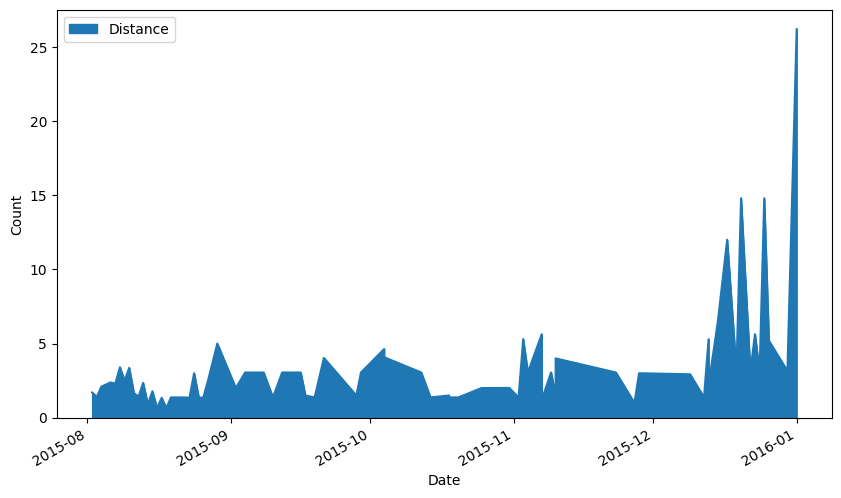

In [19]:
df.plot(kind = 'area', figsize=(10,6))
plt.ylabel("Count")

In [20]:
df.describe()

,Distance
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


In [21]:
df.loc['2015-11','Distance']

Date
2015-11-02    1.37
2015-11-03    5.30
2015-11-04    3.05
2015-11-07    5.63
2015-11-07    1.26
2015-11-07    1.20
2015-11-09    3.05
2015-11-10    1.50
2015-11-10    1.50
2015-11-10    4.00
2015-11-23    3.05
2015-11-27    1.00
2015-11-28    3.00
Name: Distance, dtype: float64

In [22]:
len(df.loc['2015-11'])

13

In [23]:
def total_seconds(time):
    if time is np.nan:
        return np.nan 
    hrs, mins, seconds = str(time).split(':')
    seconds = int(seconds) + 60 * int(mins) + 60 * 60 * int(hrs)
    return seconds    

In [24]:
df['Seconds'] = df.Time.map(total_seconds)

In [25]:
df.head(10)

,Distance,Time,Seconds
Date,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
2015-08-08,3.40,NaN,NaN
2015-08-09,2.50,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0
2015-08-11,1.67,0:13:07,787.0


In [26]:
df.describe()

,Distance,Seconds
count,81.000000,52.000000
mean,3.137531,1901.788462
std,3.634519,2560.424171
min,0.650000,376.000000
25%,1.370000,583.750000
50%,2.100000,1343.500000
75%,3.050000,1743.250000
max,26.200000,15643.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2015-08-02 to 2016-01-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Distance  81 non-null     float64
 1   Time      52 non-null     object 
 2   Seconds   52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [28]:
df.fillna(0).describe()

,Distance,Seconds
count,81.000000,81.000000
mean,3.137531,1220.901235
std,3.634519,2240.756985
min,0.650000,0.000000
25%,1.370000,0.000000
50%,2.100000,573.000000
75%,3.050000,1426.000000
max,26.200000,15643.000000


In [29]:
df['Minutes'] = df['Seconds'].map(lambda x: x / 60)

In [30]:
df.fillna(0).describe()

,Distance,Seconds,Minutes
count,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354
std,3.634519,2240.756985,37.345950
min,0.650000,0.000000,0.000000
25%,1.370000,0.000000,0.000000
50%,2.100000,573.000000,9.550000
75%,3.050000,1426.000000,23.766667
max,26.200000,15643.000000,260.716667


<AxesSubplot: xlabel='Distance', ylabel='Minutes'>

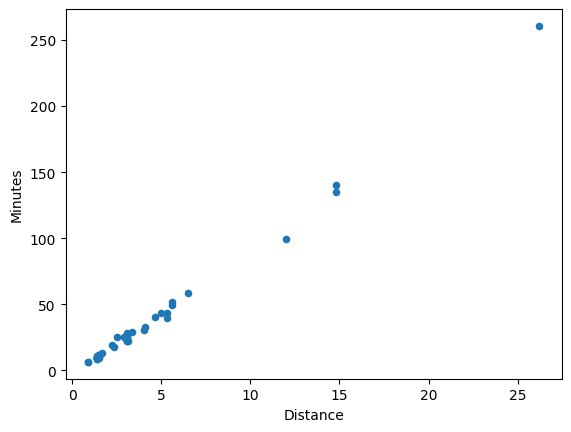

In [31]:
df.plot(x='Distance', y='Minutes', kind='scatter')

In [32]:
df.corr()

C:\Users\WZHRERO\AppData\Local\Temp\1\ipykernel_22372\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Distance,Seconds,Minutes
Distance,1.000000,0.997203,0.997203
Seconds,0.997203,1.000000,1.000000
Minutes,0.997203,1.000000,1.000000


In [33]:
df.corr(method = 'spearman')

C:\Users\WZHRERO\AppData\Local\Temp\1\ipykernel_22372\875244283.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman')


,Distance,Seconds,Minutes
Distance,1.00000,0.96482,0.96482
Seconds,0.96482,1.00000,1.00000
Minutes,0.96482,1.00000,1.00000


In [34]:
df.corr(method = 'kendall')

C:\Users\WZHRERO\AppData\Local\Temp\1\ipykernel_22372\3622761649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'kendall')


,Distance,Seconds,Minutes
Distance,1.00000,0.88305,0.88305
Seconds,0.88305,1.00000,1.00000
Minutes,0.88305,1.00000,1.00000


<AxesSubplot: >

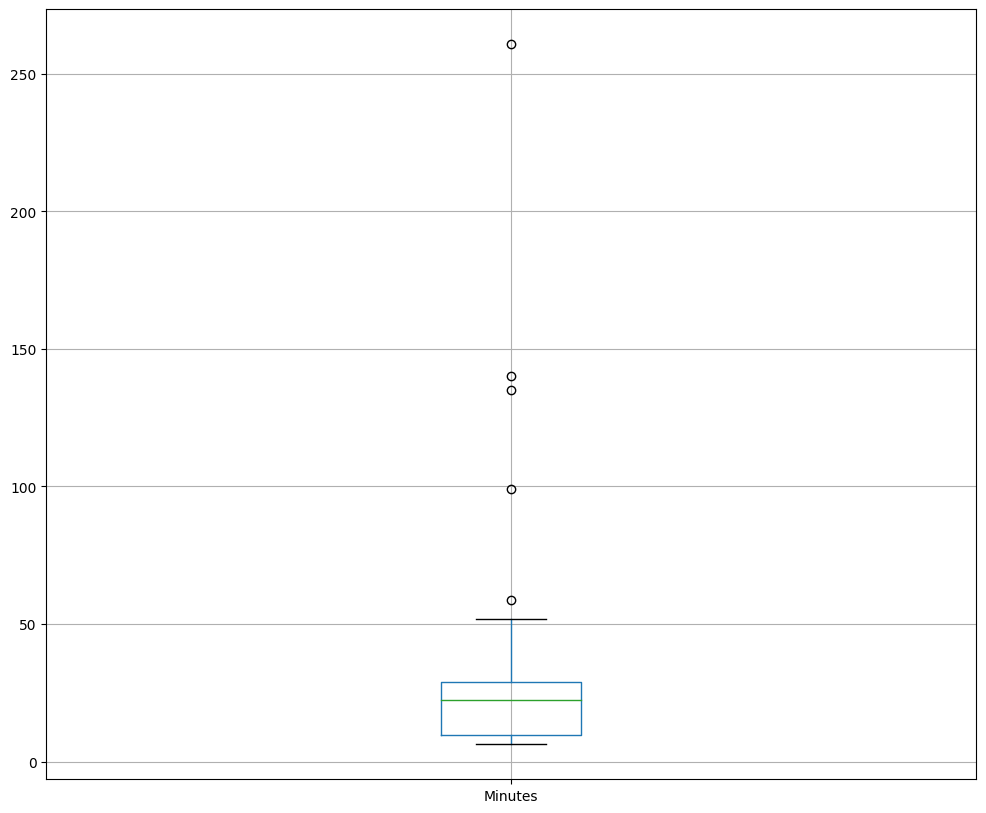

In [35]:
df.boxplot('Minutes', return_type = 'axes', figsize=(12,10))

In [36]:
df['Min_Per_Km'] = df['Minutes'] / df['Distance']

In [37]:
df.fillna(0).describe()

,Distance,Seconds,Minutes,Min_Per_Km
count,81.000000,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354,4.959450
std,3.634519,2240.756985,37.345950,3.803856
min,0.650000,0.000000,0.000000,0.000000
25%,1.370000,0.000000,0.000000,0.000000
50%,2.100000,573.000000,9.550000,6.962963
75%,3.050000,1426.000000,23.766667,7.792350
max,26.200000,15643.000000,260.716667,10.000000


array([[<AxesSubplot: title={'center': 'Min_Per_Km'}>]], dtype=object)

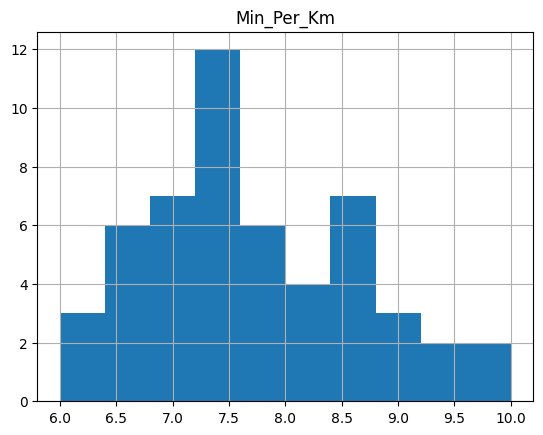

In [38]:
df.hist('Min_Per_Km')

array([[<AxesSubplot: title={'center': 'Min_Per_Km'}>]], dtype=object)

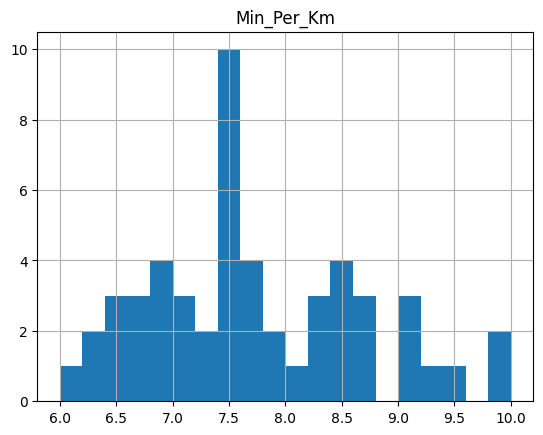

In [39]:
df.hist('Min_Per_Km', bins = 20)

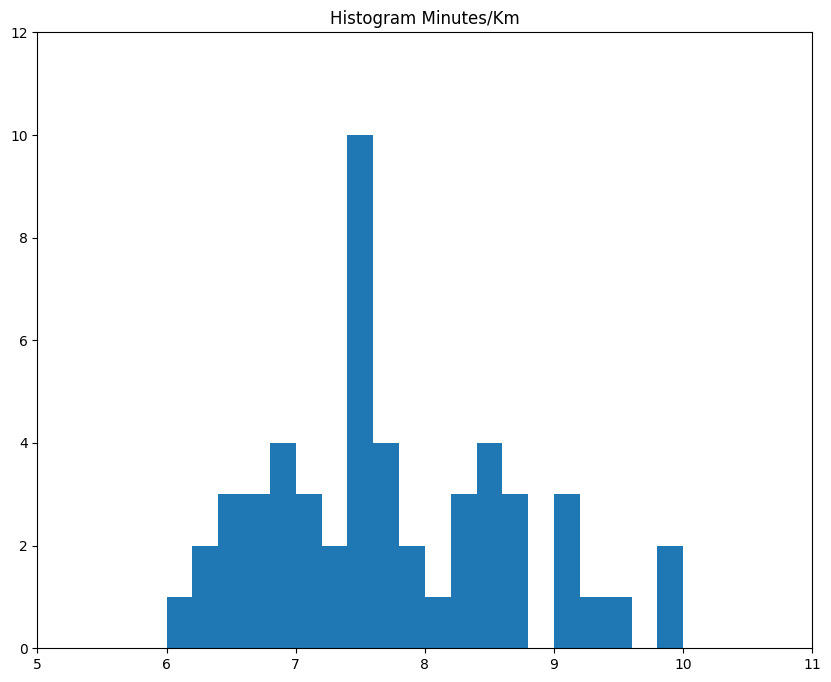

In [40]:
df.hist('Min_Per_Km', bins = 20, figsize = (10, 8))
plt.xlim((5, 11))
plt.ylim((0, 12))
plt.title("Histogram Minutes/Km")
plt.grid(False)
#plt.savefig('./hist_minutes_per_km.png')

<AxesSubplot: xlabel='Date'>

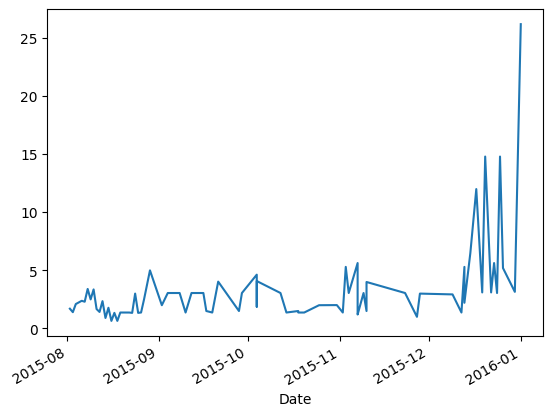

In [41]:
df['Distance'].plot()

In [42]:
df.head(15)

,Distance,Time,Seconds,Minutes,Min_Per_Km
Date,,,,,
2015-08-02,1.70,NaN,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN,NaN
2015-08-08,3.40,NaN,NaN,NaN,NaN
2015-08-09,2.50,NaN,NaN,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0,28.616667,8.516865
2015-08-11,1.67,0:13:07,787.0,13.116667,7.854291


<AxesSubplot: xlabel='Date'>

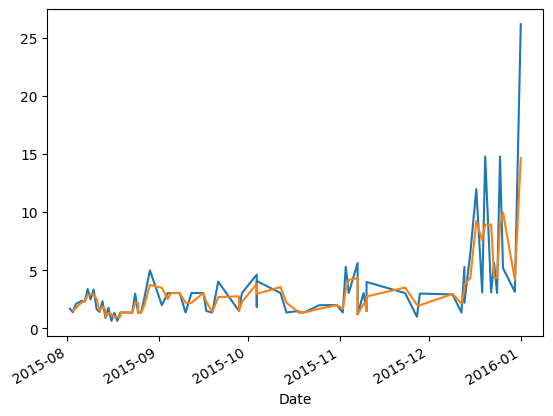

In [43]:
df['Distance'].plot()
pd.Series(df['Distance']).rolling(window = 2).mean().plot()

<AxesSubplot: xlabel='Date'>

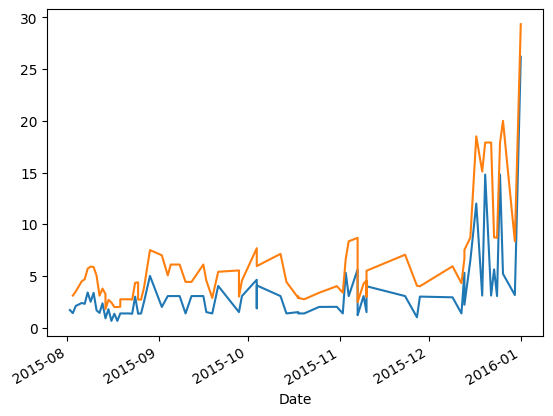

In [44]:
df['Distance'].plot()
pd.Series(df['Distance']).rolling(window = 2).sum().plot()

In [45]:
df.index[0:20]

DatetimeIndex(['2015-08-02', '2015-08-03', '2015-08-04', '2015-08-06',
               '2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10',
               '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14',
               '2015-08-14', '2015-08-15', '2015-08-16', '2015-08-17',
               '2015-08-18', '2015-08-19', '2015-08-19', '2015-08-20'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [46]:
df['2015-11':'2015-12']

,Distance,Time,Seconds,Minutes,Min_Per_Km
Date,,,,,
2015-11-02,1.37,0:08:43,523.0,8.716667,6.362530
2015-11-03,5.30,0:39:26,2366.0,39.433333,7.440252
2015-11-04,3.05,0:22:12,1332.0,22.200000,7.278689
2015-11-07,5.63,0:49:05,2945.0,49.083333,8.718176
2015-11-07,1.26,NaN,NaN,NaN,NaN
2015-11-07,1.20,NaN,NaN,NaN,NaN
2015-11-09,3.05,0:22:36,1356.0,22.600000,7.409836
2015-11-10,1.50,0:09:00,540.0,9.000000,6.000000
2015-11-10,1.50,0:11:33,693.0,11.550000,7.700000


<AxesSubplot: xlabel='Date'>

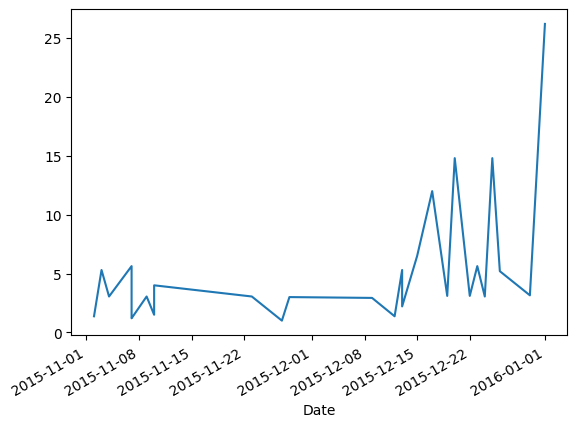

In [47]:
df['2015-11':'2016-1-1']['Distance'].plot()

In [48]:
df.loc['2015-8-12']

Distance           1.42
Time            0:10:35
Seconds           635.0
Minutes       10.583333
Min_Per_Km     7.453052
Name: 2015-08-12 00:00:00, dtype: object

In [49]:
df.reset_index(inplace=False)

,Date,Distance,Time,Seconds,Minutes,Min_Per_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
76,2015-12-24,3.05,0:25:08,1508.0,25.133333,8.240437
77,2015-12-25,14.80,2:20:00,8400.0,140.000000,9.459459
78,2015-12-26,5.20,NaN,NaN,NaN,NaN
79,2015-12-30,3.15,0:22:10,1330.0,22.166667,7.037037


In [50]:
#df.to_csv('../../CSV/Data/dataframe_saved_v1.csv')

## Pandas Group By and Pandas Transform

In [53]:
!pip install -U -q openpyxl

In [54]:
datapath = '../../Data/'
transform = 'xls/sales_transactions.xlsx'

In [55]:
df_tf = pd.read_excel(os.path.join(datapath, transform))
df_tf.head(20)

,account,name,order,sku,quantity,unit price,ext price
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65


In [56]:
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   account     12 non-null     int64  
 1   name        12 non-null     object 
 2   order       12 non-null     int64  
 3   sku         12 non-null     object 
 4   quantity    12 non-null     int64  
 5   unit price  12 non-null     float64
 6   ext price   12 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 800.0+ bytes


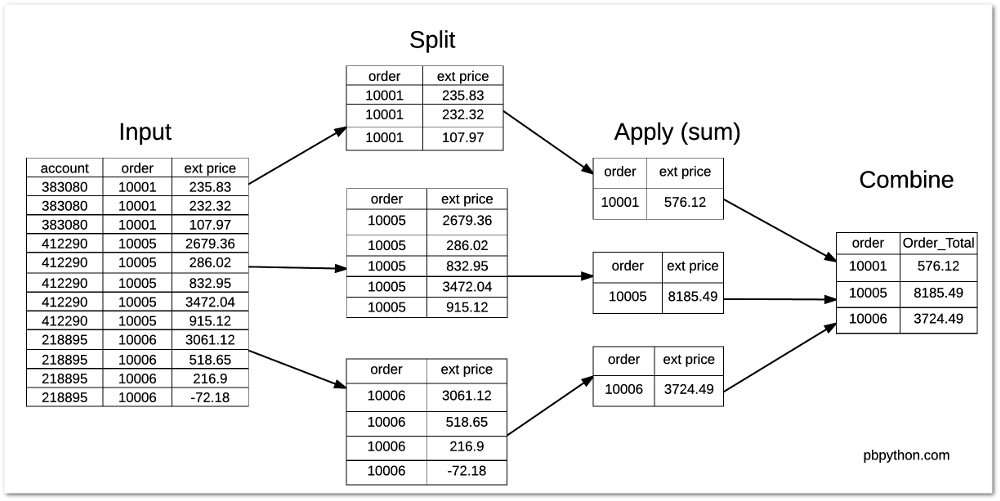

In [57]:
display(Image(os.path.join(datapath, "figs", 'groupby-example.png'), width=700))

In [58]:
gb = df_tf.groupby('order')
print(type(gb))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [59]:
gb.head()

,account,name,order,sku,quantity,unit price,ext price
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65


In [60]:
#dir(gb)

len(gb)

3

In [61]:
for g in gb:
    print(g[0])
    print(type(g[0]))
    print(g[1].head())
    print(type(g[1]))

10001
<class 'int'>
   account      name  order       sku  quantity  unit price  ext price
0   383080  Will LLC  10001  B1-20000         7       33.69     235.83
1   383080  Will LLC  10001  S1-27722        11       21.12     232.32
2   383080  Will LLC  10001  B1-86481         3       35.99     107.97
<class 'pandas.core.frame.DataFrame'>
10005
<class 'int'>
   account           name  order       sku  quantity  unit price  ext price
3   412290  Jerde-Hilpert  10005  S1-06532        48       55.82    2679.36
4   412290  Jerde-Hilpert  10005  S1-82801        21       13.62     286.02
5   412290  Jerde-Hilpert  10005  S1-06532         9       92.55     832.95
6   412290  Jerde-Hilpert  10005  S1-47412        44       78.91    3472.04
7   412290  Jerde-Hilpert  10005  S1-27722        36       25.42     915.12
<class 'pandas.core.frame.DataFrame'>
10006
<class 'int'>
    account       name  order       sku  quantity  unit price  ext price
8    218895  Kulas Inc  10006  S1-27722        32  

In [62]:
df_tf.groupby('order')["ext price"].sum()

order
10001     576.12
10005    8185.49
10006    3724.49
Name: ext price, dtype: float64

In [63]:
order_total = df_tf.groupby('order')["ext price"].sum().rename("Order_Total").reset_index()
order_total

,order,Order_Total
0,10001,576.12
1,10005,8185.49
2,10006,3724.49


In [64]:
df_tf1 = df_tf.merge(order_total)
df_tf1

,account,name,order,sku,quantity,unit price,ext price,Order_Total
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49


In [65]:
df_tf1["Percent_of_Order"] = df_tf1["ext price"] / df_tf1["Order_Total"]
df_tf1

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12,0.409342
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12,0.403249
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12,0.187409
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49,0.327330
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49,0.034942
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49,0.101759
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49,0.424170
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49,0.111798
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49,0.821890
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49,0.139254


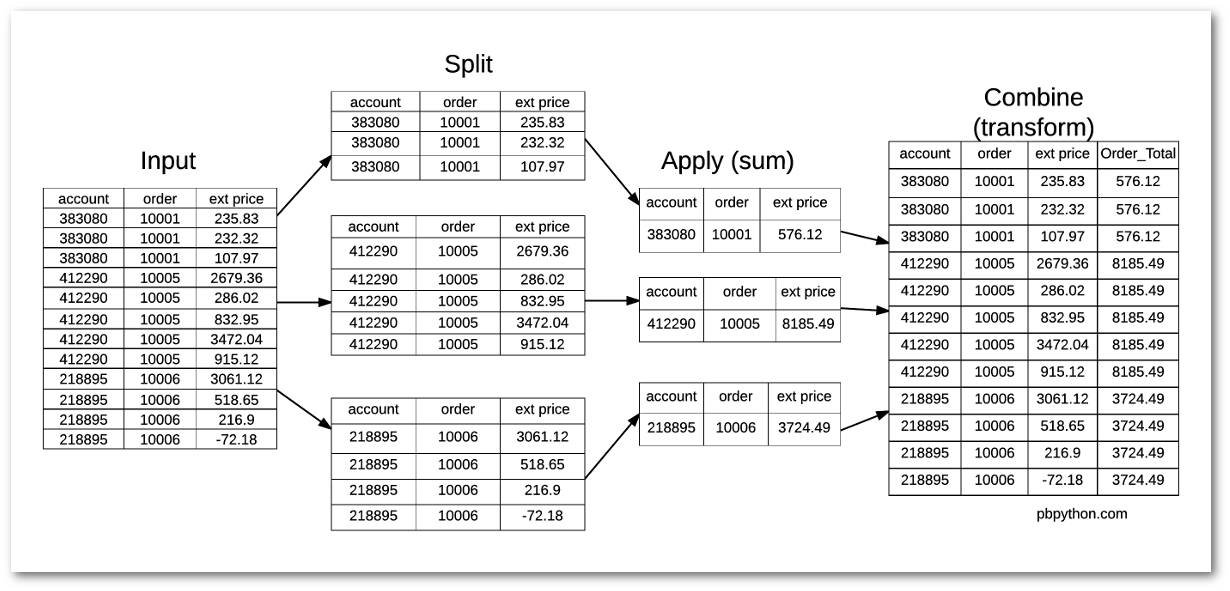

In [66]:
display(Image(os.path.join(datapath, "figs",'transform-example.png'), width=700))

In [67]:
df_tf.groupby('order')["ext price"]

In [68]:
df_tf["Order_Total"] = df_tf.groupby('order')["ext price"].transform('sum')
df_tf["Percent_of_Order"] = df_tf["ext price"] / df_tf["Order_Total"]
df_tf

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12,0.409342
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12,0.403249
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12,0.187409
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49,0.327330
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49,0.034942
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49,0.101759
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49,0.424170
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49,0.111798
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49,0.821890
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49,0.139254


In [69]:
df_tf["Percent_of_Order"] = df_tf["ext price"] / df_tf.groupby('order')["ext price"].transform('sum')
df_tf

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.69,235.83,576.12,0.409342
1,383080,Will LLC,10001,S1-27722,11,21.12,232.32,576.12,0.403249
2,383080,Will LLC,10001,B1-86481,3,35.99,107.97,576.12,0.187409
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.82,2679.36,8185.49,0.327330
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.62,286.02,8185.49,0.034942
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.55,832.95,8185.49,0.101759
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.91,3472.04,8185.49,0.424170
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.42,915.12,8185.49,0.111798
8,218895,Kulas Inc,10006,S1-27722,32,95.66,3061.12,3724.49,0.821890
9,218895,Kulas Inc,10006,B1-33087,23,22.55,518.65,3724.49,0.139254
